# 1. Data Importing

In [55]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [56]:
ticker = yf.Ticker("RELIANCE.NS")
hist = ticker.history(period="max")
print(hist.index.min(),hist.index.max())

1996-01-01 00:00:00+05:30 2025-09-26 00:00:00+05:30


In [57]:
df=yf.download("RELIANCE.NS",period="max",auto_adjust=False)

[*********************100%***********************]  1 of 1 completed


In [58]:
print("Raw Data",df.shape)
df.sample(5)

Raw Data (7467, 6)


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,,
2022-09-14,1181.572998,1194.523071,1204.514526,1187.323730,1188.362061,8678219
2018-04-02,394.443695,408.226685,411.884033,405.277985,408.249542,12494499
2017-06-08,291.806885,304.404205,307.398651,303.569885,306.301453,7903123
2011-01-11,207.566696,231.726196,239.715179,228.263168,237.726501,21147094
2021-02-15,921.644409,938.044556,951.289612,934.537170,945.174744,15791099


# 2. Data Preprocessing

In [59]:
df=df.reset_index()
df.columns

MultiIndex([(     'Date',            ''),
            ('Adj Close', 'RELIANCE.NS'),
            (    'Close', 'RELIANCE.NS'),
            (     'High', 'RELIANCE.NS'),
            (      'Low', 'RELIANCE.NS'),
            (     'Open', 'RELIANCE.NS'),
            (   'Volume', 'RELIANCE.NS')],
           names=['Price', 'Ticker'])

In [60]:
df.columns=['Date','Adj Close','Close','High','Low','Open','Volume']
df.sample(5)

,Date,Adj Close,Close,High,Low,Open,Volume
1538,2001-11-22,16.050314,20.843437,21.307577,20.714907,21.064796,31503531
2404,2005-03-28,33.968410,40.422989,40.937111,40.094521,40.130222,56543733
2031,2003-10-15,28.143114,34.178524,34.482002,33.300228,33.500168,89588449
6583,2022-03-03,1082.155151,1097.585083,1114.452881,1093.777710,1107.599609,10186748
1052,2000-01-12,15.875394,21.543217,21.778856,20.147228,20.636360,169586471


In [61]:
beginning_cols=['Date','Open','Close','Adj Close']
later_cols=[c for c in df.columns if c not in beginning_cols]
df=df[beginning_cols+later_cols]

In [62]:
df.sample(5)

,Date,Open,Close,Adj Close,High,Low,Volume
5434,2017-07-10,341.754700,341.240387,327.118652,343.080505,340.383209,3504540
3133,2008-02-27,297.729584,295.838074,259.973572,301.501221,293.735107,23321593
7218,2024-09-30,1519.400024,1476.574951,1470.701172,1524.974976,1474.400024,27008814
7037,2024-01-03,1305.000000,1291.650024,1282.160156,1317.000000,1288.599976,9037536
6275,2020-12-04,908.693176,898.424805,882.717285,908.693176,895.309692,18464552


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7467 entries, 0 to 7466
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       7467 non-null   datetime64[ns]
 1   Open       7467 non-null   float64       
 2   Close      7467 non-null   float64       
 3   Adj Close  7467 non-null   float64       
 4   High       7467 non-null   float64       
 5   Low        7467 non-null   float64       
 6   Volume     7467 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 408.5 KB


In [64]:
df.describe()

,Date,Open,Close,Adj Close,High,Low,Volume
count,7467,7467.000000,7467.000000,7467.000000,7467.000000,7467.000000,7.467000e+03
mean,2010-09-11 13:09:31.313780736,346.964605,346.698458,334.571114,350.734280,342.948274,5.846928e+07
min,1996-01-01 00:00:00,5.462565,5.487558,3.449042,5.487558,5.428648,0.000000e+00
25%,2003-02-25 12:00:00,25.600868,25.565166,19.643961,26.007883,25.170647,1.339303e+07
50%,2010-08-12 00:00:00,199.553116,199.313095,183.162903,201.838943,196.827255,2.360792e+07
75%,2018-03-08 12:00:00,426.707657,426.159042,411.770615,430.936447,422.181702,6.082384e+07
max,2025-09-26 00:00:00,1604.449951,1600.900024,1589.138184,1608.800049,1585.500000,1.448889e+09
std,NaN,423.736545,423.511546,422.413069,427.586892,419.709043,1.012907e+08


Text(0, 0.5, 'Adj Close Price')

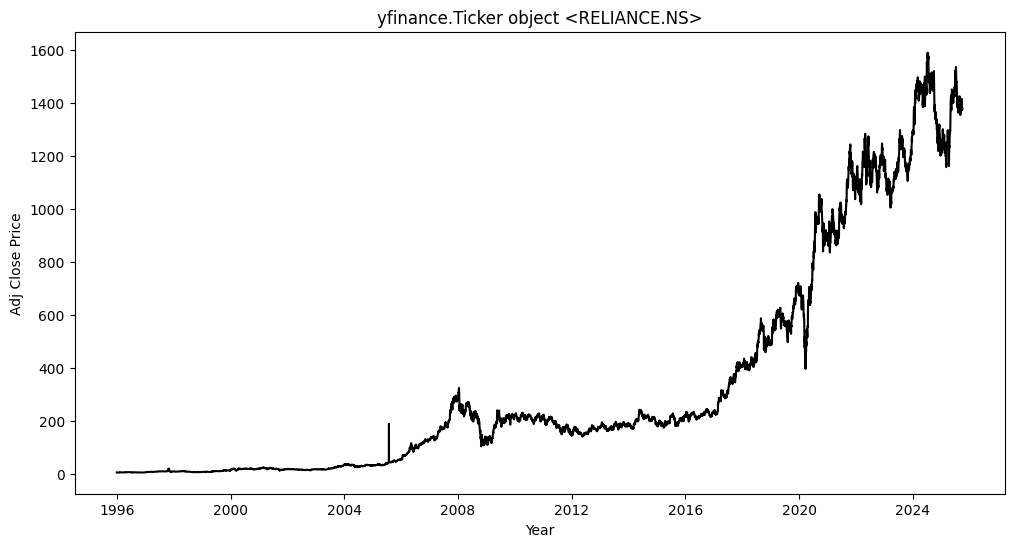

In [67]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'],df['Adj Close'],c='black')
plt.title(ticker)
plt.xlabel("Year")
plt.ylabel("Adj Close Price")

In [108]:
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()
df1=scaling.fit_transform(df.drop(columns=['Date']))

In [109]:
df1=pd.DataFrame(df1,columns=df.drop(columns=['Date']).columns)
df1['Date']=df['Date']

In [110]:
df1.sample(9)

,Open,Close,Adj Close,High,Low,Volume,Date
6243,1.554475,1.530755,1.522265,1.546771,1.549546,-0.394801,2020-10-20
7065,2.620991,2.679390,2.689302,2.649734,2.655712,-0.507004,2024-02-14
3531,-0.213307,-0.229107,-0.266507,-0.209965,-0.224071,-0.304163,2009-10-20
4483,-0.379899,-0.376342,-0.380983,-0.379414,-0.376807,-0.435776,2013-08-23
5775,0.377696,0.379335,0.376237,0.374567,0.378254,-0.439353,2018-11-26
5603,0.183267,0.184262,0.179502,0.176274,0.184138,-0.431903,2018-03-14
6643,2.050384,2.051230,2.044826,2.045663,2.059726,-0.480750,2022-06-01
3099,-0.000212,-0.001526,-0.072141,0.007681,0.003910,-0.222483,2008-01-10
5405,-0.097588,-0.086270,-0.088172,-0.090316,-0.089717,-0.340100,2017-05-29


In [111]:
df1.describe()

,Open,Close,Adj Close,High,Low,Volume,Date
count,7.467000e+03,7.467000e+03,7.467000e+03,7.467000e+03,7467.000000,7.467000e+03,7467
mean,6.090094e-17,1.218019e-16,1.218019e-16,6.090094e-17,0.000000,-6.090094e-17,2010-09-11 13:09:31.313780736
min,-8.059841e-01,-8.057248e-01,-7.839347e-01,-8.074846e-01,-0.804229,-5.772810e-01,1996-01-01 00:00:00
25%,-7.584554e-01,-7.583141e-01,-7.455930e-01,-7.594904e-01,-0.757189,-4.450484e-01,2003-02-25 12:00:00
50%,-3.479081e-01,-3.480312e-01,-3.584604e-01,-3.482457e-01,-0.348172,-3.441944e-01,2010-08-12 00:00:00
75%,1.882028e-01,1.876357e-01,1.827706e-01,1.875818e-01,0.188794,2.324715e-02,2018-03-08 12:00:00
max,2.967810e+00,2.961632e+00,2.970199e+00,2.942443e+00,2.960706,1.372794e+01,2025-09-26 00:00:00
std,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00,1.000067,1.000067e+00,NaN
